In [35]:
!pip install ucimlrepo

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

In [37]:
df=pd.DataFrame(X)
df['class']=y
df["class"]=(df["class"]=='g').astype(int)
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [38]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [39]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(df, oversample=False):
  X=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X, np.reshape(y, (-1,1))))
  return data

In [40]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
14992,51.6228,22.3215,3.3615,0.1931,0.0972,-5.5054,29.5777,11.6289,58.8050,71.0521,0
320,68.6967,24.7983,3.1733,0.1858,0.0996,19.6607,76.9693,23.1282,3.4614,178.7120,1
5855,28.0095,11.3457,2.3997,0.4263,0.2371,10.6611,9.2992,4.6015,17.5160,147.4120,1
31,87.4217,26.7866,3.4231,0.2809,0.1761,10.4779,68.3446,-24.0948,0.3647,371.7900,1
2167,34.9077,21.9432,2.8779,0.2384,0.1225,37.3566,27.3424,-6.7122,19.1787,89.6273,1
...,...,...,...,...,...,...,...,...,...,...,...
18500,20.0048,12.4164,2.4141,0.4971,0.2794,-1.5624,7.0273,-10.1055,87.3427,61.4184,0
2368,35.3542,18.5771,2.6069,0.3708,0.2114,-29.8184,19.3303,6.6790,8.4580,126.0990,1
5147,30.4298,21.5400,3.1836,0.2608,0.1314,-18.9118,19.9719,-10.0079,1.4710,111.5850,1
477,95.6947,21.7506,3.5485,0.1259,0.0632,41.2638,83.1004,-8.6471,0.2763,237.7810,1


In [41]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train[train.columns[:-1]], train[train.columns[-1]])

In [42]:
# Modified code for ipython-input-35-51df2ea4bb13
# Original:
# train, x_train, y_train = scale_dataset(train, oversample=True)
# valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
# test, x_test, y_test = scale_dataset(test, oversample=False)


# Updated code:
train_data = scale_dataset(train, oversample=True)
valid_data = scale_dataset(valid, oversample=False)
test_data = scale_dataset(test, oversample=False)

# Extracting X and y from the returned data
x_train = train_data[:, :-1]  # Select all columns except the last one
y_train = train_data[:, -1]   # Select only the last column
x_valid = valid_data[:, :-1]
y_valid = valid_data[:, -1]
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
y_pred = knn_model.predict(x_test)
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [45]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)

In [46]:
from sklearn.linear_model import LogisticRegression

lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [47]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1334
         1.0       0.89      0.90      0.90      2470

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [48]:
def plot_history(history):
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()

In [49]:
import tensorflow as tf

def train_model(x_train, y_train, num_node,lr, batch_size, epochs):
  inputs = tf.keras.Input(shape=(10,))
  nn_model= tf.keras.Sequential([
      inputs,
      tf.keras.layers.Dense(num_node, activation='relu',),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_node, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history=nn_model.fit(x_train, y_train, batch_size=batch_size,verbose=0, epochs=epochs, validation_split=0.2)
  return nn_model, history

num_node=32
dropout_prob=0.2
lr=0.001
batch_size=32
epochs=10

nn_model, history=train_model(x_train, y_train, num_node, lr, batch_size, epochs)

In [50]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)  # Enable probability estimates
svm_model = svm_model.fit(x_train, y_train)

In [51]:
y_proba = svm_model.predict_proba(x_test)[:, 1]  # Probabilidade de classe 'Gamma'
threshold = 0.6  # Ajustar o threshold
y_pred_threshold = (y_proba > threshold).astype(int)

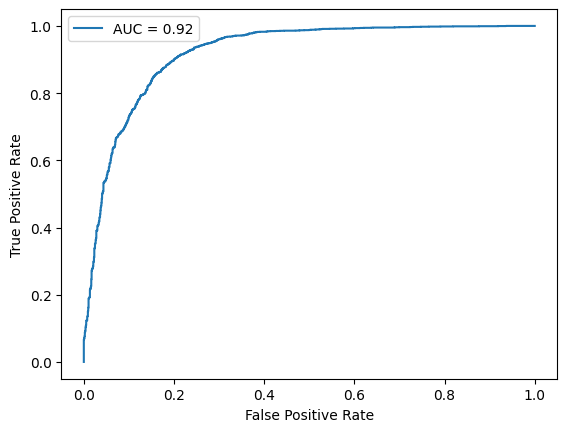

In [52]:
from sklearn.metrics import roc_curve, auc

y_proba = svm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [53]:
svm_model = SVC(class_weight='balanced')  # Ajusta pesos automaticamente
svm_model.fit(x_train, y_train)


SVC(class_weight='balanced')

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'class_weight': ['balanced', None]}
grid = GridSearchCV(LogisticRegression(), param_grid, scoring='f1', cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None]},
             scoring='f1')

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      1334
         1.0       0.89      0.92      0.91      2470

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.88      0.88      0.88      3804



In [57]:
svm_model = SVC(class_weight='balanced', probability=True)  # Add probability=True
svm_model.fit(x_train, y_train)

SVC(class_weight='balanced', probability=True)

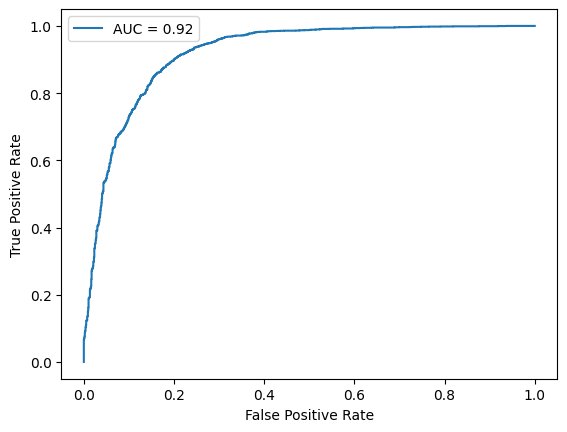

In [58]:
from sklearn.metrics import roc_curve, auc

y_proba = svm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [61]:
def calcac(thresholdy):
  y_proba = svm_model.predict_proba(x_test)[:, 1]  # Probabilidade de classe 'Gamma'
  threshold = thresholdy  # Ajustar o threshold
  y_pred_threshold = (y_proba > threshold).astype(int)
  y_proba = svm_model.predict_proba(x_test)[:, 1]
  fpr, tpr, _ = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  print(f'AUC = {roc_auc:.2f}')
  print(classification_report(y_test, y_pred_threshold))
  return roc_auc

In [67]:
calcac(0.5)

AUC = 0.92
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1334
         1.0       0.90      0.88      0.89      2470

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



0.919263242872491

In [70]:

best_val_ac= 0
val_ac=0
best_threshold=0

for thresholdy in [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]:
  print(f'Threshold: {thresholdy}')
  calcac(thresholdy)
  val_ac=calcac(thresholdy)
  if val_ac >= best_val_ac:
    best_val_ac=val_ac
    best_threshold=thresholdy


Threshold: 0.1
AUC = 0.92
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70      1334
         1.0       0.80      0.99      0.88      2470

    accuracy                           0.83      3804
   macro avg       0.88      0.77      0.79      3804
weighted avg       0.86      0.83      0.82      3804

AUC = 0.92
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70      1334
         1.0       0.80      0.99      0.88      2470

    accuracy                           0.83      3804
   macro avg       0.88      0.77      0.79      3804
weighted avg       0.86      0.83      0.82      3804

Threshold: 0.2
AUC = 0.92
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      1334
         1.0       0.85      0.97      0.90      2470

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.84      3804
weighted av

In [71]:
# eu não sei o que deu de errado, mas sei que está errado
print(f'Best threshold: {best_threshold}')
print(f'Best AUC: {best_val_ac}')

Best threshold: 0.9
Best AUC: 0.919263242872491
